# Sentiment analysis with Keras
0 - Negative

1 - postitive

# Restaurant Review Sentiment Analysis

This project demonstrates how to perform sentiment analysis on restaurant reviews using Keras, a popular deep learning library. The goal is to classify reviews as either positive (1) or negative (0), helping restaurants better understand customer feedback and improve their services.

# Key features of this project:

Preprocessing and cleaning of textual review data
Building and training a neural network for sentiment classification
Evaluation of model performance
Practical examples for real-world restaurant review datasets
Explore how machine learning can transform raw customer feedback into actionable

# Step 1 - Data Ingestion

In [3]:
url1 = "https://raw.githubusercontent.com/devangprabhune/Machine_Learning_Dev/refs/heads/main/Sentiment%20Analysis/Restaurant_Reviews.tsv"
print(url1)

https://raw.githubusercontent.com/devangprabhune/Machine_Learning_Dev/refs/heads/main/Sentiment%20Analysis/Restaurant_Reviews.tsv


In [4]:
import pandas as pd

df = pd.read_csv(url1, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
a = "Wow! This is AMAZING ..."
a.lower()

import re
re.sub("[^a-z 0-9]", "",a.lower() )

'wow this is amazing '

In [6]:
def preprocess_text(text: str) -> str:
  text = text.lower()
  text = re.sub("[^a-z 0-9]", "", text)
  return text.strip()

In [7]:
preprocess_text("Amritsar, Banglore, Chennai")

'amritsar banglore chennai'

# Using Preprocessing on entire reviews dataset

In [8]:
X = df["Review"].apply(preprocess_text)
X.head()

,Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


# Apply TFIDF vectorizer

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_pre.shape

(1000, 2067)

# Dimensionality reduction with SVD

In [13]:
from sklearn.decomposition import TruncatedSVD

# Initialize Truncated SVD with 300 components
svd = TruncatedSVD(n_components=300)
# Apply SVD to the TF-IDF vectorized data
X_pre_red = svd.fit_transform(X_pre)
# Display the reduced data
X_pre_red

array([[ 0.11457856,  0.19021733,  0.29860514, ...,  0.02442133,
         0.00996015,  0.04197678],
       [ 0.20041515,  0.06219204,  0.10386266, ..., -0.07329184,
         0.01321989, -0.01394901],
       [ 0.248602  , -0.05947125, -0.09197252, ...,  0.02573235,
         0.02021874,  0.00295238],
       ...,
       [ 0.25745938,  0.21354303, -0.25268858, ..., -0.0055186 ,
         0.00990392, -0.00037285],
       [ 0.21755074,  0.04422346, -0.07900024, ..., -0.01551965,
         0.03292317,  0.02983175],
       [ 0.22278543,  0.02689929, -0.02221585, ...,  0.02321675,
         0.01319023,  0.03193783]])

In [14]:
X_pre_red.shape

(1000, 300)

In [15]:
Y = df["Liked"]
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [16]:
Y.value_counts()

,count
Liked,
1,500
0,500


# Train-Test split

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)

In [18]:
xtrain

array([[ 0.22714971, -0.1355275 , -0.05020052, ..., -0.00768395,
         0.06327299, -0.03588579],
       [ 0.04699212,  0.01342239,  0.03451729, ...,  0.00616282,
         0.03918255, -0.01395995],
       [ 0.19705026, -0.13148614, -0.08873096, ..., -0.00558956,
        -0.02304135,  0.02737343],
       ...,
       [ 0.28454308,  0.11308598,  0.31554384, ..., -0.00165651,
         0.00588139,  0.00641293],
       [ 0.16594076, -0.07105196, -0.05824824, ...,  0.03709792,
         0.04009966, -0.05946843],
       [ 0.17456908,  0.04421883,  0.01479547, ...,  0.00617684,
         0.03508977,  0.01672993]])

In [19]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [20]:
xtest

array([[ 0.07691892,  0.13494159, -0.07038309, ...,  0.00836524,
        -0.00097061, -0.00707335],
       [ 0.254266  , -0.07500539, -0.03373472, ..., -0.01441231,
        -0.02245686, -0.00332559],
       [ 0.26574114,  0.01069196,  0.0962324 , ..., -0.02045015,
         0.01136345,  0.01290743],
       ...,
       [ 0.14916885,  0.1664999 ,  0.2207663 , ...,  0.01744725,
        -0.00913279, -0.03572351],
       [ 0.14640626,  0.21286946, -0.21691328, ..., -0.03141468,
         0.0115317 ,  0.0326292 ],
       [ 0.32089175, -0.02481936,  0.01883727, ..., -0.00762866,
        -0.03093394,  0.01380829]])

In [21]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


In [22]:
xtrain.shape

(800, 300)

In [23]:
ytrain.shape

(800,)

# Neural Network Build


In [25]:
!pip install tensorflow

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [27]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [32]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=100, callbacks=[es])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5165 - loss: 3.0680 - val_accuracy: 0.5625 - val_loss: 2.2966
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5623 - loss: 2.1034 - val_accuracy: 0.6250 - val_loss: 1.6145
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5698 - loss: 1.4985 - val_accuracy: 0.5750 - val_loss: 1.2099
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5991 - loss: 1.1398 - val_accuracy: 0.5375 - val_loss: 0.9793
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6184 - loss: 0.9361 - val_accuracy: 0.5125 - val_loss: 0.8506
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6796 - loss: 0.8205 - val_accuracy: 0.7125 - val_loss: 0.7771
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7358 - loss: 0.7539 - val_accuracy: 0.7375 - val_loss: 0.7352
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7601 - loss: 0.7111 - val_accuracy: 0.8000

#Plotting the Learning Curve

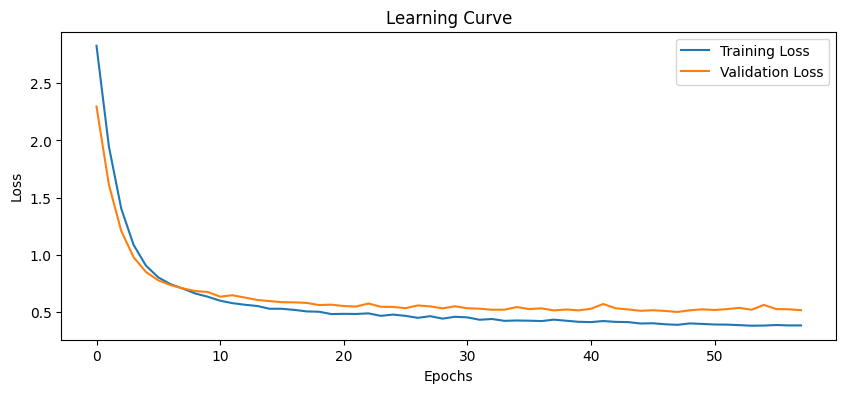

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Model Evaluation

In [34]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9602 - loss: 0.3628


[0.371982216835022, 0.9599999785423279]

In [35]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7911 - loss: 0.6394 


[0.6156808733940125, 0.7950000166893005]

In [36]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.0740816 ],
       [0.9517341 ],
       [0.02293078],
       [0.04809071],
       [0.97165966]], dtype=float32)

In [37]:
ypred_train = (yprob_train >= 0.5).astype(int).flatten()
ypred_train[0:5]

array([0, 1, 0, 0, 1])

In [38]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [39]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.31733507],
       [0.95798635],
       [0.9737699 ],
       [0.97798294],
       [0.4229972 ]], dtype=float32)

In [40]:
ypred_test = (yprob_test >= 0.5).astype(int).flatten()
ypred_test[0:5]

array([0, 1, 1, 1, 0])

In [41]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


# Save the Objects

TFIDF, SVD, Model

In [42]:
import joblib

joblib.dump(tfidf, "tfidf.joblib")

['tfidf.joblib']

In [43]:
joblib.dump(svd, "svd.joblib")

['svd.joblib']

In [44]:
model.save("sentiment_model.keras")

# Loading the Files

In [45]:
tfidf = joblib.load("tfidf.joblib")
tfidf

TfidfVectorizer()

In [46]:
svd = joblib.load("svd.joblib")
svd

TruncatedSVD(n_components=300)

In [47]:
from keras.models import load_model

model = load_model("sentiment_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)

# Prediction Phase

# Out of Sample Prediction

In [48]:
def analyse_sentiment(model, tfidf, svd):
  text = input("Please write the review : ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  yprob = model.predict(text_pre_red)
  if yprob >= 0.5:
    print("Positive sentiment")
    ypred = 1
  else:
    print("Negative sentiment")
    ypred = 0
  return ypred, yprob

In [49]:
analyse_sentiment(model, tfidf, svd)

Please write the review : Taste was good but hygiene was lacking
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Negative sentiment


(0, array([[0.38417557]], dtype=float32))

In [50]:
analyse_sentiment(model, tfidf, svd)

Please write the review : Beautiful restaurant and amazing food quality with polite staff.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Positive sentiment


(1, array([[0.97473395]], dtype=float32))

# Building the Sentiment Analyser NeuralNet is complete.